In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom


In [2]:
sales_df = pd.read_csv('supermarket_sale.csv')

In [3]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
Invoice ID                 1000 non-null object
Branch                     1000 non-null object
City                       1000 non-null object
Customer type              1000 non-null object
Gender                     1000 non-null object
Product line               1000 non-null object
Unit price                 1000 non-null float64
Quantity                   1000 non-null int64
Tax 5%                     1000 non-null float64
Total                      1000 non-null float64
Date                       1000 non-null object
Time                       1000 non-null object
Payment                    1000 non-null object
cogs                       1000 non-null float64
gross margin percentage    1000 non-null float64
gross income               1000 non-null float64
Rating                     1000 non-null float64
dtypes: float64(7), int64(1), object(9)
memory usage: 132.9+ KB


In [4]:
sales_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [94]:
sales_df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


# GETTING THE TOTAL NUMBER OF UNQUE ITEMS OF ALL COLUMNS

In [5]:
#first let us get the total number of objects series
object_series = []
for i in sales_df.columns:
    if sales_df[i].dtype == 'object':  
        #get all of the unique data and display them
        data_count = sales_df[i].nunique()
        object_series.append(i)
        print('Total number of unique data found in {} is: {} '.format(i, data_count))
print('The total number of categorical objects are '+ str(len(object_series)))
print(object_series)

Total number of unique data found in Invoice ID is: 1000 
Total number of unique data found in Branch is: 3 
Total number of unique data found in City is: 3 
Total number of unique data found in Customer type is: 2 
Total number of unique data found in Gender is: 2 
Total number of unique data found in Product line is: 6 
Total number of unique data found in Date is: 89 
Total number of unique data found in Time is: 506 
Total number of unique data found in Payment is: 3 
The total number of categorical objects are 9
['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Date', 'Time', 'Payment']


# GENDER CLASSIFICATION- MOST VISITED

Female    501
Male      499
Name: Gender, dtype: int64

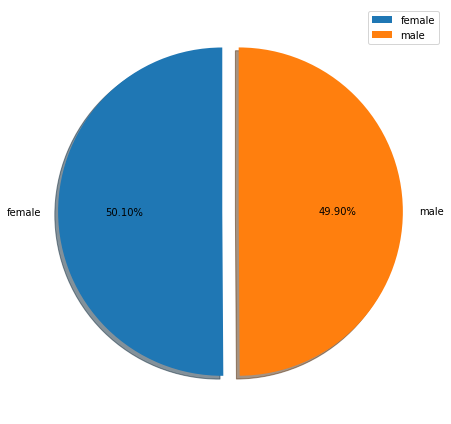

In [96]:
gender = sales_df['Gender'].value_counts()
# plotting the pie chart of the classification
fig, ax1 = plt.subplots(figsize=(12,6))
labels = ['female', 'male']
ax1.pie(gender, labels= labels, autopct = '%0.2f%%', explode=(0.1,0), shadow=True, startangle=90)
plt.tight_layout()
plt.legend()
gender

THE PIE CHART INDICATES THE TOTAL PERCENTAGE OF DISTRIBUTION BETWEEN MALE AND FEMALE VISITORS IN THE STORES. FROM THE CHART IT CAN BE ASSUMED THAT THE RATE OF DIFFERENCES BETWEEN MALE AND FEMALE IS ABOUT 0.2 DIFF

# CUSTOMERS ANALYSIS

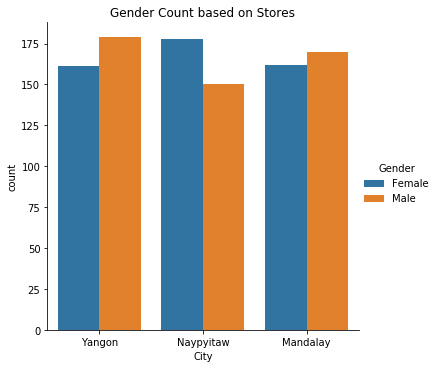

In [97]:
# CUSTOMER ANALYSIS FOR THE THREE STORES

each_stores = sales_df.groupby('Branch')['Gender'].value_counts().reset_index(name='Count') #to rename the values to count

#creating a pivot table
each_stores_pivot = each_stores.pivot(
    columns= 'Branch',
    index='Gender',
    values= 'Count'
).reset_index()
# Graph representing each city by the number of males and females
# USING SEABORN TO SHOWCASE
sns.catplot(data=sales_df, x='City', kind='count', hue='Gender')
plt.title("Gender Count based on Stores");


In [98]:
each_stores_pivot

Branch,Gender,A,B,C
0,Female,161,162,178
1,Male,179,170,150


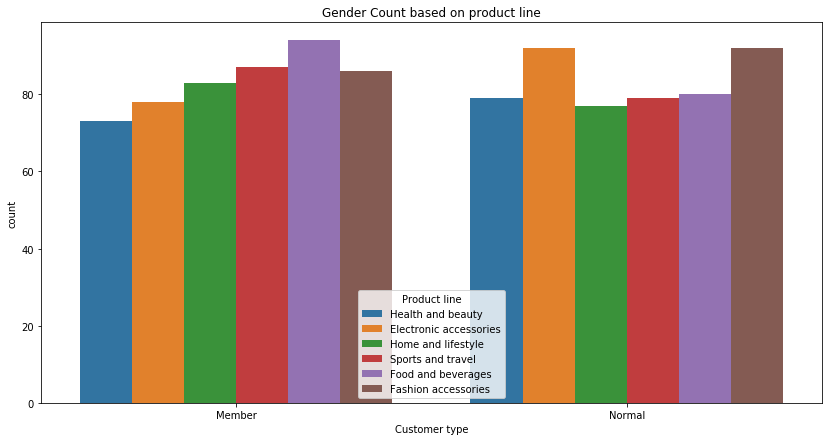

In [99]:
# CUSTOMER ANALYSIS FOR THE CUSTOMER TYPE AND BY THE PRODUCT LINE
fig2, ax2 =plt.subplots(figsize=(14,7))
sns.countplot(data= sales_df, x='Customer type', hue='Product line')
plt.title("Gender Count based on product line");

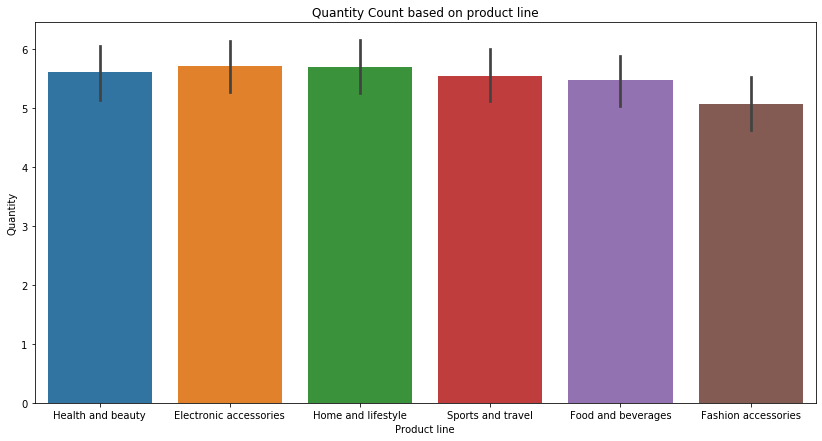

In [100]:
fig2, ax2 =plt.subplots(figsize=(14,7))
sns.barplot(data=sales_df, y = 'Quantity', x = 'Product line');
plt.title("Quantity Count based on product line");

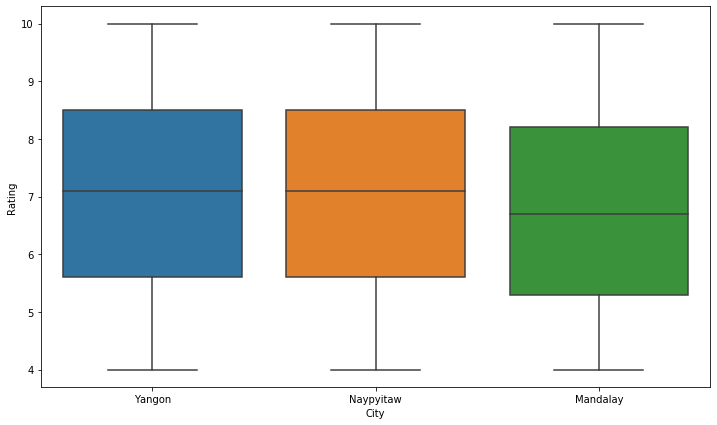

In [101]:
# LETS CHECK FOR THE RATING PER CITY OR BRANCH
fig3, ax3 =plt.subplots(figsize=(12,7))
sns.boxplot(data=sales_df, x='City', y='Rating')


# ANALYZE THE DATE AND TIME 
First we have to convert the date into a standard date

In [102]:
sales_df['Date'] = pd.to_datetime(sales_df['Date'])
sales_df['Time']= pd.to_datetime(sales_df['Time'])

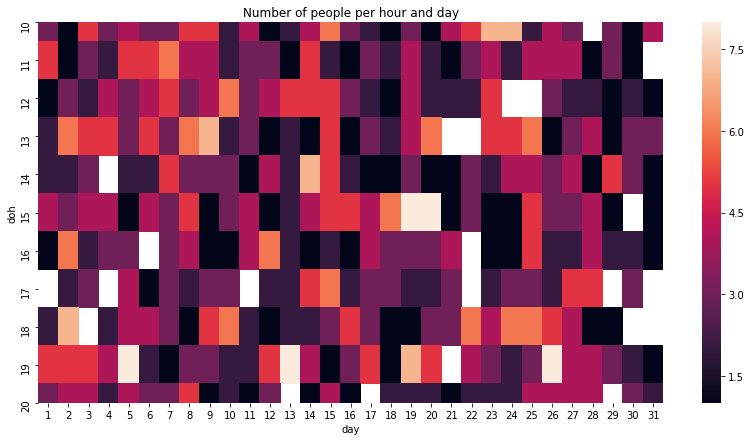

In [103]:
#lets make a new section for the table to analize which month, day and time was more popular among shoppers
dom = lambda x: x.month
sales_df['dom'] = sales_df['Date'].apply(dom)
doh = lambda x: x.hour
sales_df['doh'] = sales_df['Time'].apply(doh)
day = lambda x: x.day
sales_df['day'] = sales_df['Date'].apply(day)

value_count = lambda x: len(x) 
#getting the number of people who visited for each day and hour appears
freq_time_day = sales_df.groupby(['day','doh']).apply(value_count).reset_index(name='count')

freq_time_day_pivot = freq_time_day.pivot(
    columns='day',
    index='doh',
    values='count'
)
fig3, ax3 =plt.subplots(figsize=(14,7))
sns.heatmap(freq_time_day_pivot)
plt.title("Number of people per hour and day");


# ANALYZE THE TIME AND QUANTITY OF PRODUCT BOUGHT BY CUSTOMERS

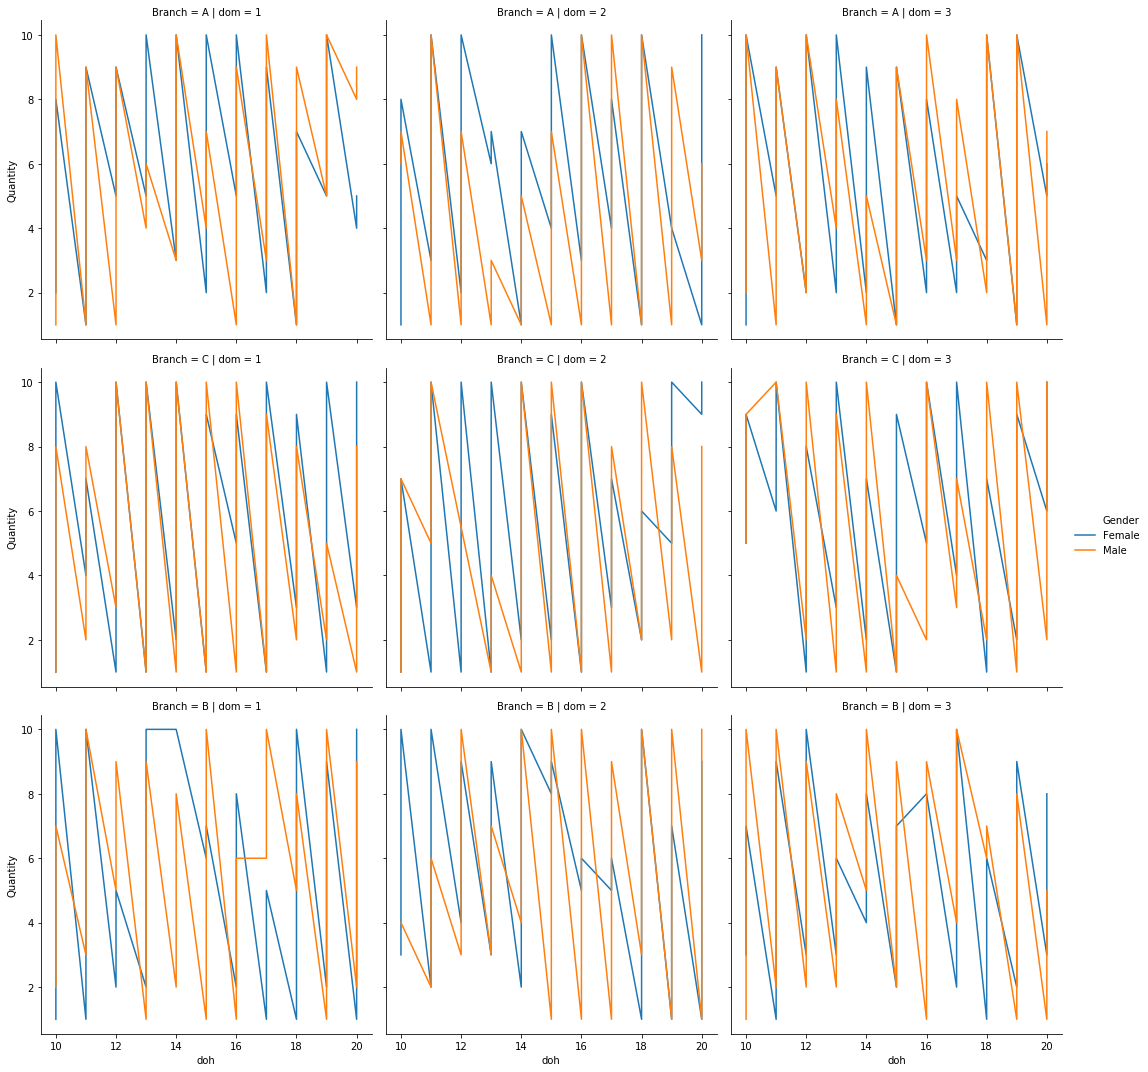

In [104]:
#we will analyze based on the month, the hour and the quantity per branch.
gender_per_branch_per_quantity= sns.relplot(x="doh",  y = 'Quantity', col= 'dom' , row= 'Branch',hue='Gender', estimator = None, kind="line", data =sales_df)

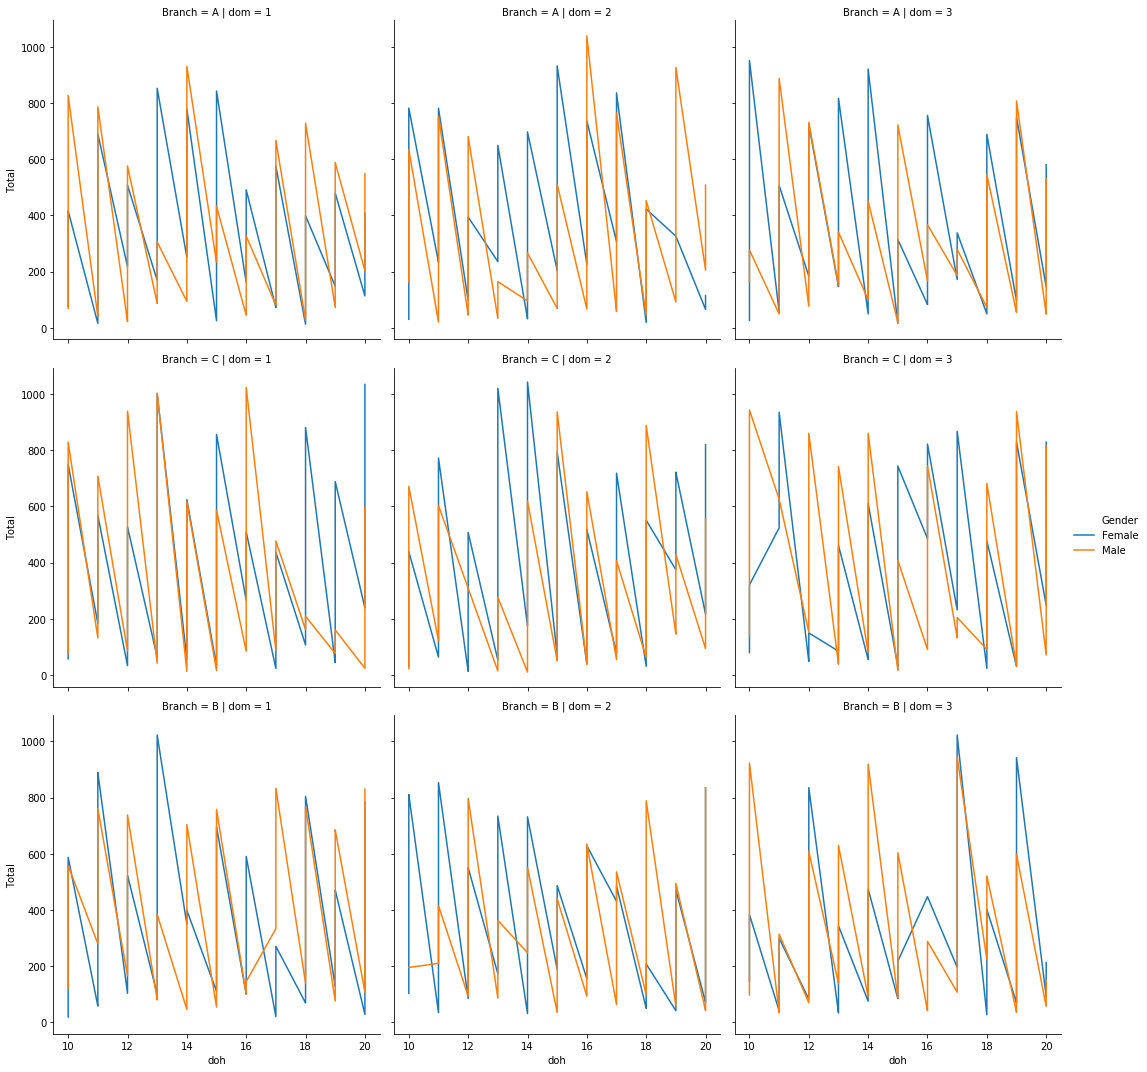

In [105]:
#we will analyze based on the month, the hour and the total amount per branch
total_per_branch_per_gender= sns.relplot(x="doh",  y = 'Total', col= 'dom' , row= 'Branch',hue='Gender', estimator = None, kind="line", data =sales_df)

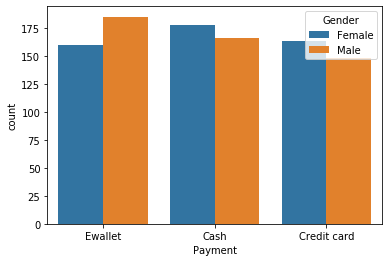

In [106]:
#LETS COUNT THE MOST POPULAR PAYMENT METHOD BASE ON EACH GENDER
payment_method = sns.countplot(data=sales_df, x='Payment', hue='Gender')


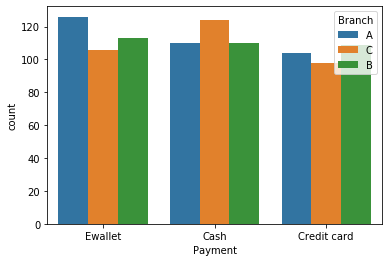

In [107]:
#LETS COUNT THE MOST POPULAR PAYMENT METHOD BASE ON EACH BRANCH
payment_branch = sns.countplot(data=sales_df, x='Payment', hue='Branch')

# STATISTICAL INFERENCES

The probability of female in store A is 0.5426829268292683 and for male is 0.4573170731707317
Lets us compare the probability of the number of male of female using a normal curve for binomial density given each probability.
Let us imagine we have a range of 0 to 30 male and female customers, we will run a trial to see if the probability of both male entering the store is higher or lower 
probability of 10 male customers for Branch C is 0.05900240992531073 and for female is 0.01065570817352576


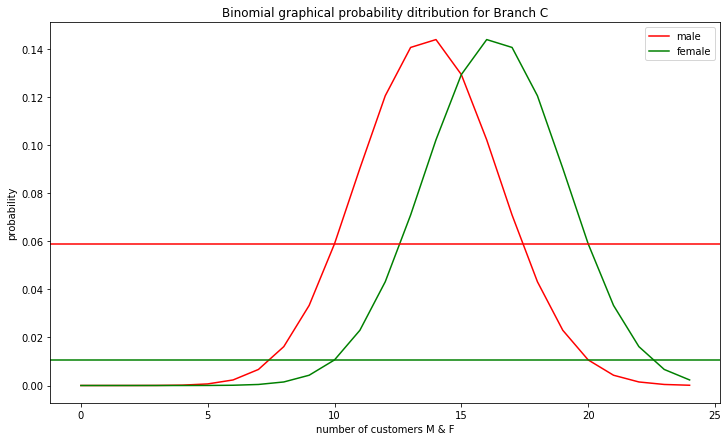

In [286]:
def prob_store_a(data, branch):
    store_a = data[data.Branch == branch]
    total= len(store_a)
    #probability of male to female
    len_male = np.arange(len(store_a[store_a.Gender == 'Male']))
    prob_m_f = float(len(store_a[store_a.Gender == 'Male']) / total)
    #probability of female to male
    prob_f_m = float(len(store_a[store_a.Gender == 'Female']) / total)
    print('The probability of female in store A is {} and for male is {}'.format(prob_f_m, prob_m_f))
    #lets make binomial distribution curve. Lets us make a comparision that we had 10000 male and female customers
    print('Lets us compare the probability of the number of male of female using a normal curve for binomial density given each probability.')
    #fig, ax =plt.subplots(figsize=(14,7))
    print('Let us imagine we have a range of 0 to 30 male and female customers, we will run a trial to see if the probability of both male entering the store is higher or lower ')
    #declare the rate of success for 0 to 30 customers
    k = np.arange(0,25)
    #binomial probability
    trial_male = binom.pmf(k=k, n=30 , p=prob_m_f)
    #binomial probability female for each
    trial_female = binom.pmf(k=k, n=30 , p=prob_f_m)
    p_10_m= binom.pmf(k=10, n=30 , p=prob_m_f)
    p_10_f= binom.pmf(k=10, n=30 , p=prob_f_m)
    ax, fig = plt.subplots(figsize=(12,7))
    ax= plt.plot(k,  trial_male, color='r')
    ax= plt.plot(k, trial_female, color='g')
    plt.axhline(p_10_m, linestyle='solid', color='r', label='male')
    plt.axhline(p_10_f, linestyle='solid', color='green', label='female')
    plt.legend()
    plt.title('Binomial graphical probability ditribution for Branch ' + branch)
    plt.xlabel('number of customers M & F')
    plt.ylabel('probability')
    
    print( 'probability of 10 male customers for Branch {} is {} and for female is {}'.format(branch, p_10_m, p_10_f))
        
prob_store_a(sales_df, 'C') #CHANGE THE BRANCH FROM A-C TO GET THE DIFFERENT GRAPHICAL REPRESENTATIONS



    

# TESTING HYPHOTHESIS- STATISTICAL INFERENCE

In [22]:
gross_income_aov = sales_df[['Branch','gross income']]

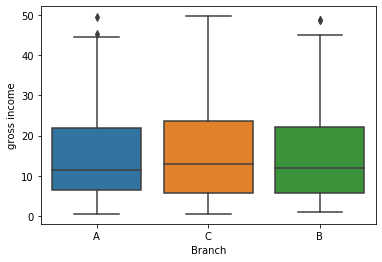

In [23]:
sns.boxplot(data = gross_income_aov, x='Branch', y='gross income')

In [51]:
gross_income_aov.groupby('Branch').describe()

gross income                                                    \
              count       mean        std     min       25%       50%   
Branch                                                                  
A             340.0  14.874001  11.030477  0.6045  6.547125  11.46800   
B             332.0  15.232024  11.545122  0.8875  5.711250  12.04200   
C             328.0  16.052367  12.531470  0.5085  5.784500  12.92475   

                          
              75%    max  
Branch                    
A       21.873375  49.49  
B       22.170750  48.69  
C       23.607375  49.65

In [53]:
mean_a = np.mean(gross_income_aov.loc[gross_income_aov['Branch']== 'A']['gross income'])

14.87400147058824

<p>The Analysis of Variance(ANOVA) will be used to compute to test the null hypothesis of the income of the shoppers in each store to check if they they are the same or not. We willl assume a null hypothesis which states that for all three stores the income are the same and the alternative which states that they are not equal. The formula for ANOVA is getting the F-Distribution of the value gotten from MSTR(Mean square due to Treatmens) divided by MSE(Mean square due to error)</p>

In [66]:
#calculating for MSTR
#MSTR Is gotten from the division of SSTR(Sum of total squares due to treatment) / k-1
#k represent the total number of branches we are comparing the mean for
estimated_mean = (14.87 + 15.23+ 16.05) / 3
sstr = 340*(14.87 - estimated_mean)**2 + 332*(15.23 - estimated_mean)**2 + 328*(16.05 - estimated_mean)**2
k = 3-1
mstr = sstr / k
print('Overall estimated mean of the stores is {}'.format(estimated_mean))
print('============ ' + '\n')
print('The total number of stores in K but subtracted by 1 is {}'.format(k))
print('============ ' + '\n')
print('MSTR is given as  {}'.format(mstr))

Overall estimated mean of the stores is 15.383333333333335

The total number of stores in K but subtracted by 1 is 2

MSTR is given as  121.5886222222225


In [73]:
#calculating for within the square due to error MSE
#Formula is gotten as SSE/total_number of samples - k
sse = (340-1)*11.030 + (332-1)*11.545 + (328-1)*12.531
subtr_total = (340+332+328) - 3
mse = sse/subtr_total
sst = sstr + sse
print('estimated sum of squares due to error {}'.format(sse))
print('============ ' + '\n')
print('total stores - the number of elements that is branches {}'.format(subtr_total))
print('============ ' + '\n')
print('MSE is given as  {}'.format(mse))
print('sum of total squares is given as  {}'.format(sst))

estimated sum of squares due to error 11658.202000000001

total stores - the number of elements that is branches 997

MSE is given as  11.69328184553661
sum of total squares is given as  11901.379244444446


In [74]:
import scipy.stats as stats
from scipy.stats import f

In [78]:
f_distribution = mstr / mse

p_value = f.cdf(f_distribution, 2, 997)
print('f distribution is {}'.format(f_distribution))
print('==================== '+ '\n')
print('p_value is {}'.format(p_value))

f distribution is 10.398160570176758

p_value is 0.9999660695710858


<p>After assuming a level of significance of 0.05, we discover that the p-value of the f-distribution is greater than the level of significance thus we accept the null hypothesis that the mean of each of the branches are equal.</p>

In [79]:
# another method of calculation
# using the stats.f.oneway
a = np.asarray(gross_income_aov.loc[gross_income_aov['Branch']== 'A']['gross income'])
b = np.asarray(gross_income_aov.loc[gross_income_aov['Branch']== 'B']['gross income'])
c = np.asarray(gross_income_aov.loc[gross_income_aov['Branch']== 'C']['gross income'])

In [80]:
stats.f_oneway(a,b,c)

F_onewayResult(statistic=0.8845828327760509, pvalue=0.413210174367147)

# TEST OF INDEPENDENCE FOR THE BRANCHES

<p>We will evaluate if the mean income of the different genders affects or not the Product line category of all the stores. Using the ChiSquare, we will conclude if the income of the genders is independent of the product line or not </p>

In [128]:
#construct a pivot table
from scipy.stats.distributions import chi2
gender_class = sales_df.groupby(['Gender', 'Product line'])['gross income'].mean().reset_index(name='mean')
Pivgender_class = gender_class.pivot_table(columns='Product line', index='Gender', values = 'mean')
Pivgender_class

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Gender,,,,,,
Female,15.363958,15.097917,17.550750,13.810258,18.105411,15.462511
Male,15.080570,13.860915,13.023768,16.576165,14.006488,16.207635


In [106]:
#lets find out the percentage of total users
column_sum = np.sum(Pivgender_class,axis=1)
total = np.sum(column_sum)
p_gender = column_sum / total
p_gender

Gender
Female    0.518016
Male      0.481984
dtype: float64

<p>From the above we see the ratio of income for both male and female. Based on the figure we can assume that female has a slightly higher income than male with a difference of about  3</p>

In [109]:
ratio_row = np.sum(Pivgender_class,axis=0) / total
ratio_row

Product line
Electronic accessories    0.165328
Fashion accessories       0.157260
Food and beverages        0.166034
Health and beauty         0.165012
Home and lifestyle        0.174382
Sports and travel         0.171984
dtype: float64

<p>The row ration of the various income. We obbserve that Home and Lifestyle seems to have a slightly higher income range than the others. </p>

In [123]:
expected_frequency = round(p_gender.to_frame()@(ratio_row.to_frame().T)*total,2)
expected_frequency

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Gender,,,,,,
Female,15.77,15.00,15.84,15.74,16.63,16.41
Male,14.67,13.96,14.74,14.65,15.48,15.26


In [126]:
#we will calculate for the chi-table
chi_table = (Pivgender_class - expected_frequency)**2 / expected_frequency
chi_table 

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Gender,,,,,,
Female,0.010455,0.000639,0.184764,0.236589,0.130898,0.054707
Male,0.011491,0.000703,0.199827,0.253250,0.140261,0.058847


In [132]:
chi_ = chi_table.sum()
chi_value = chi_.sum()

In [134]:
#getting the dataframe
n_row = 2
m_col = 6
df = (2-1)*(6-1)
print('dataframe is {}'.format(df))

dataframe is 5


In [137]:
#finding the p_value from the chi_square
p_value = chi2.sf(chi_value,df)
print('the chi-value is {}'.format(chi_value))
print('the p_value is {}'.format(p_value))

the chi-value is 1.2824308403037095
the p_value is 0.9367291067167454


<p>The above shows that the p_value is higher than the level of significance of 0.05, thus we accept the null hypothesis that the income of female and males for the different categories of product line and that they are independent</p>

In [140]:
#using another method. Calculating directly from stats
chi2_stat, p_val, dof, ex = stats.chi2_contingency(Pivgender_class)
print(chi2_stat, p_val, dof)

1.2808406544042932 0.9368907582915814 5


<p>We arrive at approximately the same value. We accept the null hypothesis</p>